<a href="https://www.kaggle.com/code/hwanchul/credit-card-fraud-detection-using-xgboost?scriptVersionId=268161574" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

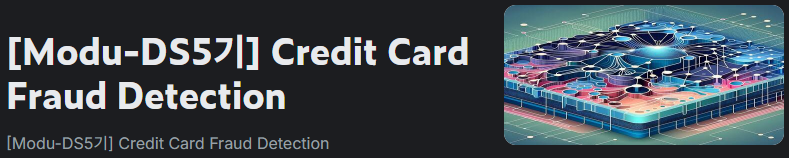

# **신용카드 사기 탐지 분류 문제**  
___
- 개요: **전처리된 Kaggle의 신용카드 데이터 셋을 활용**해서 **신용카드 사기 검출을 분류**를 수행함
- Data Decription  
  - V1, V2, …, V28 : PCA로 얻은 주성분
  - Time: 각 거래와 데이터셋의 첫 거래 사이의 경과 시간(초)
  - Amount 거래 금액
  - Class: 응답 변수로, 사기 거래인 경우 1, 그렇지 않은 경우 0의 값을 가짐  
- 평가
  - 예측할 값(y): Class (0:Not fraud, 1:fraud)
  - 평가: F1-Score 평가지표




# 데이터 불러오기 및 분석 환경 설정
---

In [1]:
!pip uninstall -y category-encoders cesium sklearn-compat #dependency issue
!pip install scikit-learn==1.7.1 imbalanced-learn==0.14.0 xgboost lightgbm statsmodels

Found existing installation: category_encoders 2.7.0
Uninstalling category_encoders-2.7.0:
  Successfully uninstalled category_encoders-2.7.0
Found existing installation: cesium 0.12.4
Uninstalling cesium-0.12.4:
  Successfully uninstalled cesium-0.12.4
Found existing installation: sklearn-compat 0.1.3
Uninstalling sklearn-compat-0.1.3:
  Successfully uninstalled sklearn-compat-0.1.3
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.13.0
    Uninstalling imbalanced-learn-0.13.0:
      Successfully uninstalled imbalanced-learn-0.13.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

train_df = pd.read_csv('/kaggle/input/modulabs-ds5-credit-card-fraud-detection/train.csv', index_col = 0)
test_df = pd.read_csv('/kaggle/input/modulabs-ds5-credit-card-fraud-detection/test.csv', index_col = 0)

In [3]:
display(train_df.head(3))
print('shape: ')
train_df.shape

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


shape: 


(170883, 31)

In [4]:
display(test_df.head(3))
print('shape: ')
test_df.shape

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
id,,,,,,,,,,,,,,,,,,,,,
170883,120396.0,-2.410892,-1.264333,-0.787460,-0.212152,1.139859,-2.030200,0.533818,-0.194852,-2.277774,...,-0.558831,-0.076699,0.054816,-1.243901,0.147148,0.974330,1.309377,0.083660,-0.611166,124.98
170884,120396.0,-1.394526,0.284790,2.979226,0.362345,-1.344546,2.278858,-1.836101,-1.797895,0.529802,...,-0.807798,1.945416,-0.539926,-0.446763,-0.521142,0.405680,-0.149237,0.458944,-0.071516,50.00
170885,120396.0,0.140378,0.989574,-0.506447,0.480553,1.407763,0.371637,0.811775,0.067702,-0.648266,...,0.120841,0.385872,1.302941,-0.177157,-0.192410,-0.724567,-0.433276,0.540947,0.323866,8.69


shape: 


(113923, 30)

In [5]:
print("--- 데이터셋 정보 ---")
print("\nTrain_df:")
train_df.info()
print("\nTest_df:")
test_df.info()

--- 데이터셋 정보 ---

Train_df:
<class 'pandas.core.frame.DataFrame'>
Index: 170883 entries, 0 to 170882
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    170883 non-null  float64
 1   V1      170883 non-null  float64
 2   V2      170883 non-null  float64
 3   V3      170883 non-null  float64
 4   V4      170883 non-null  float64
 5   V5      170883 non-null  float64
 6   V6      170883 non-null  float64
 7   V7      170883 non-null  float64
 8   V8      170883 non-null  float64
 9   V9      170883 non-null  float64
 10  V10     170883 non-null  float64
 11  V11     170883 non-null  float64
 12  V12     170883 non-null  float64
 13  V13     170883 non-null  float64
 14  V14     170883 non-null  float64
 15  V15     170883 non-null  float64
 16  V16     170883 non-null  float64
 17  V17     170883 non-null  float64
 18  V18     170883 non-null  float64
 19  V19     170883 non-null  float64
 20  V20     170883 non-null  f

# 데이터 탐색
---  

특징별 분포 확인

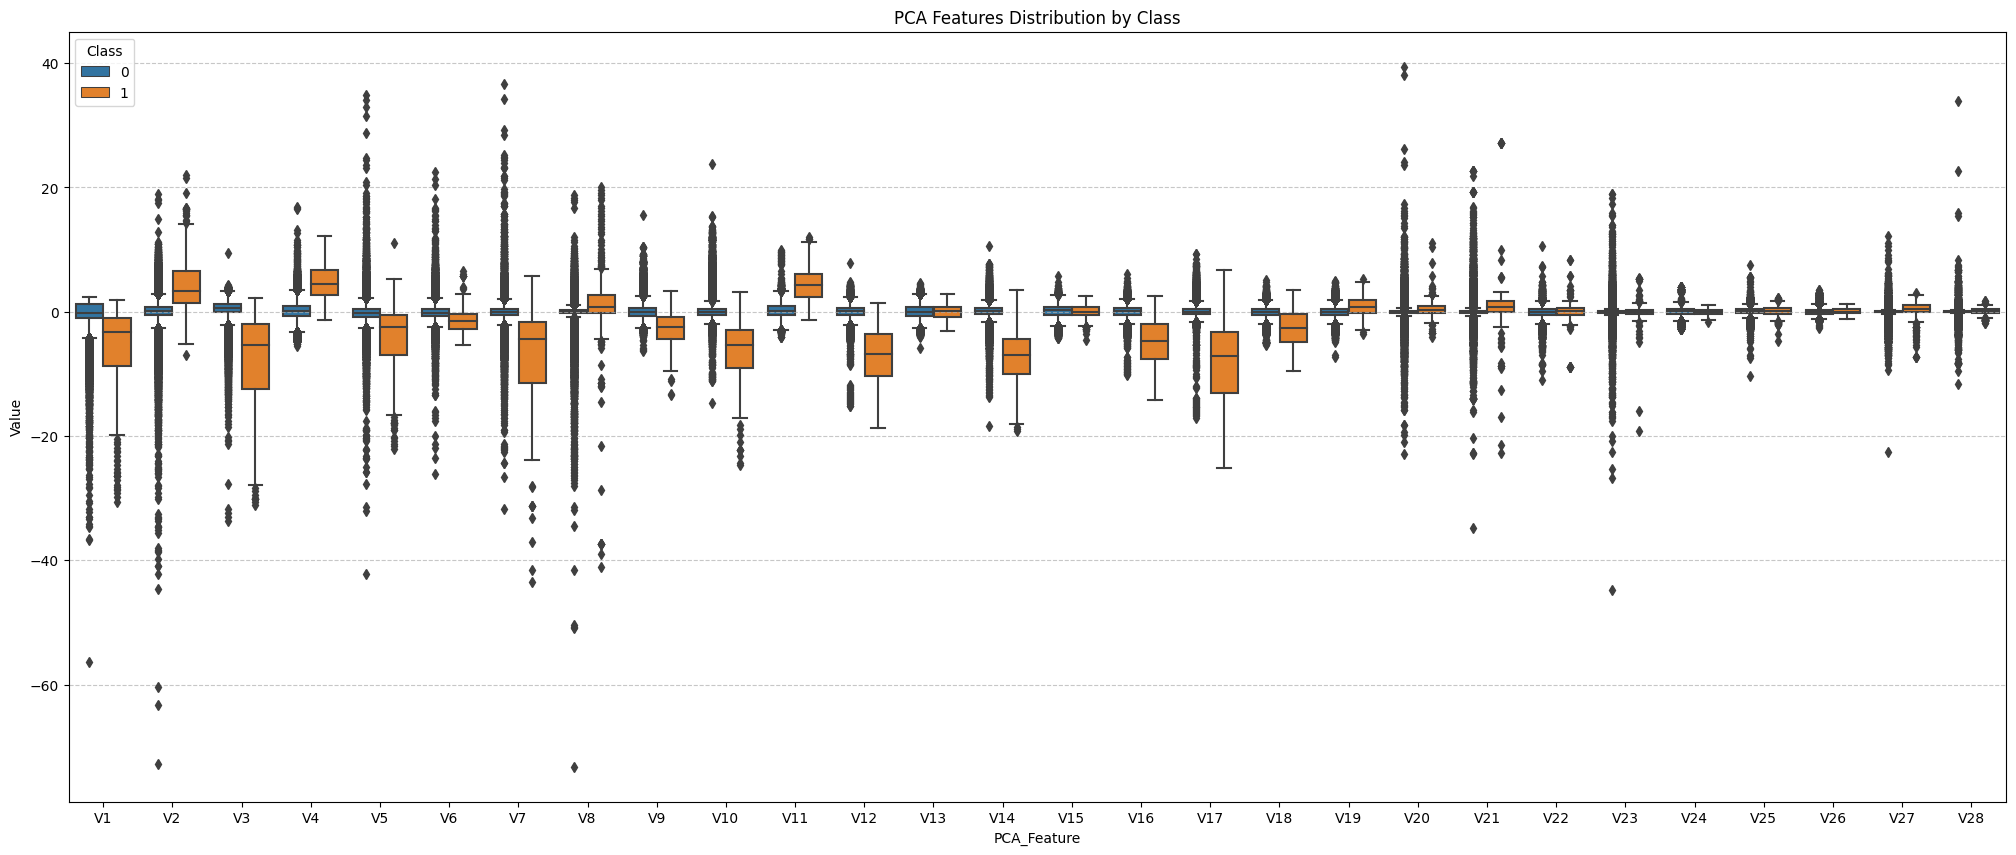

In [6]:
train_df_pca = train_df[[f'V{i}' for i in range(1, 29)] + ['Class']]

# 데이터프레임을 long-form으로 변환
df_melted = train_df_pca.melt(id_vars=['Class'], var_name='PCA_Feature', value_name='Value')

# 변환된 데이터를 사용하여 하나의 그래프에 모두 그리기
plt.figure(figsize=(25, 10))
sns.boxplot(data=df_melted, x='PCA_Feature', y='Value', hue='Class')
plt.title('PCA Features Distribution by Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added grid to the y-axis with a dashed style

plt.show()

- PCA 주성분들로 구성된 특징으로 스케일링된 상태로 원본 특징들의 선형 조합으로 구성되었을 거라고 판단됨
- 변수 이름 순으로 평균과 분산이 작아지는 추세를 가짐을 확인할 수 있음

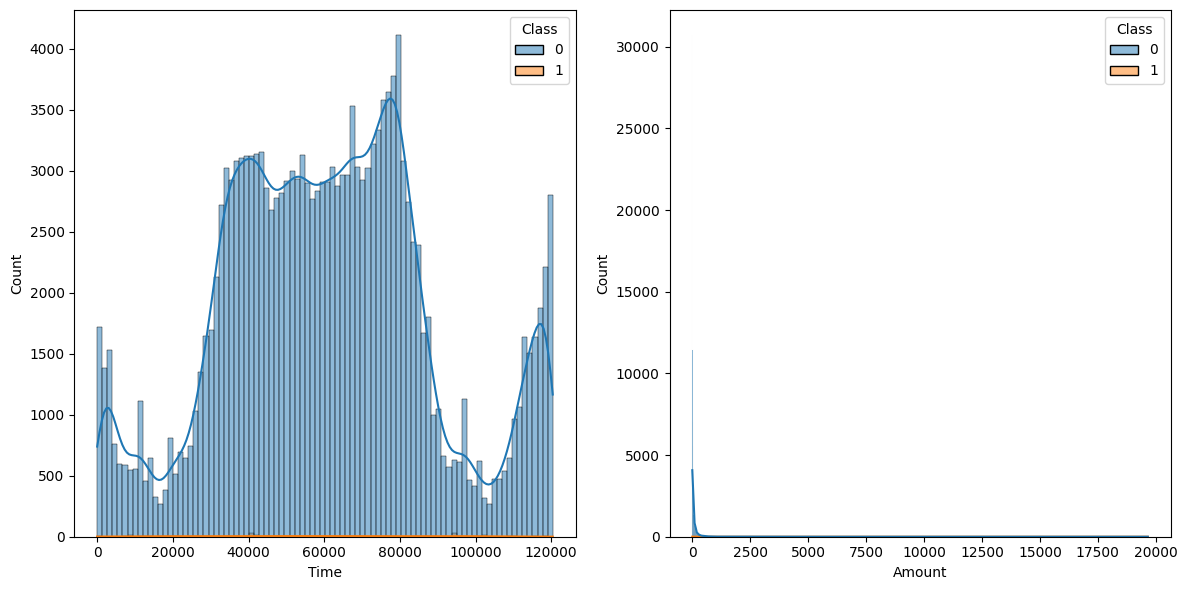

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=train_df, x='Time', hue='Class', kde=True, ax=axes[0])
sns.histplot(data=train_df, x='Amount', hue='Class', kde=True, ax=axes[1])

plt.tight_layout()
plt.show()

- 거래시간(`Time`)과 거래량(`Amount`)에 대한 분포를 확인하기 위해 시각화를 하였음
- 클래스 불균형으로 인해 사기거래(`Class=1`)의 분포를 식별하기 어려움

상관관계

<Axes: >

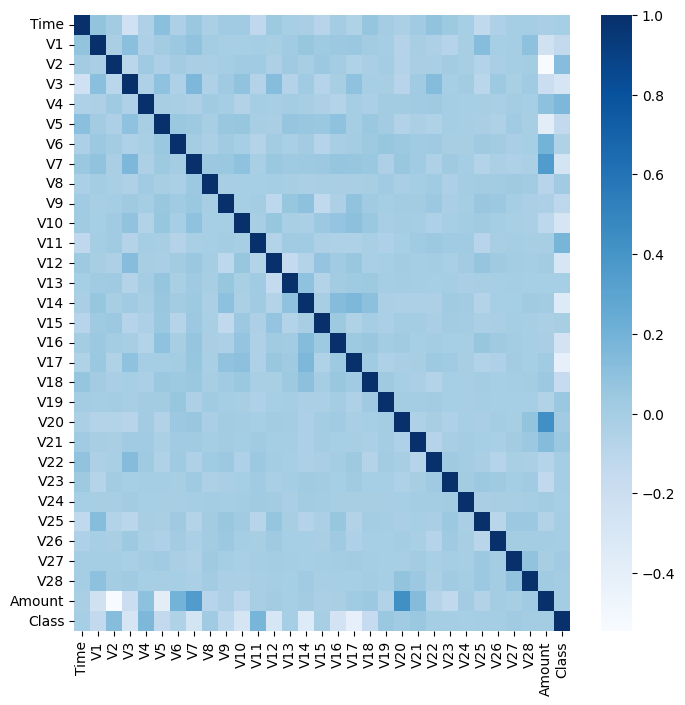

In [8]:
plt.figure(figsize = (8,8))
sns.heatmap(train_df.corr(), cmap = 'Blues')

In [9]:
train_df.corr()['Class'].apply(lambda x: abs(x)).sort_values(ascending=False)[:5]

Class    1.000000
V17      0.412954
V14      0.345635
V12      0.287091
V3       0.281337
Name: Class, dtype: float64

In [10]:
def corr_filter(df, val = 0.5):
    corr_df = df.corr().unstack().reset_index()
    corr_df.columns = ['feat_1', 'feat_2', 'corr_value']
    corr_df = corr_df[corr_df.feat_1 > corr_df.feat_2]
    return corr_df[(corr_df.corr_value >= val) | (corr_df.corr_value <= -val)]

corr_filter(train_df, 0.4)

,feat_1,feat_2,corr_value
91,V2,Amount,-0.544872
557,V17,Class,-0.412954
649,V20,Amount,0.432148


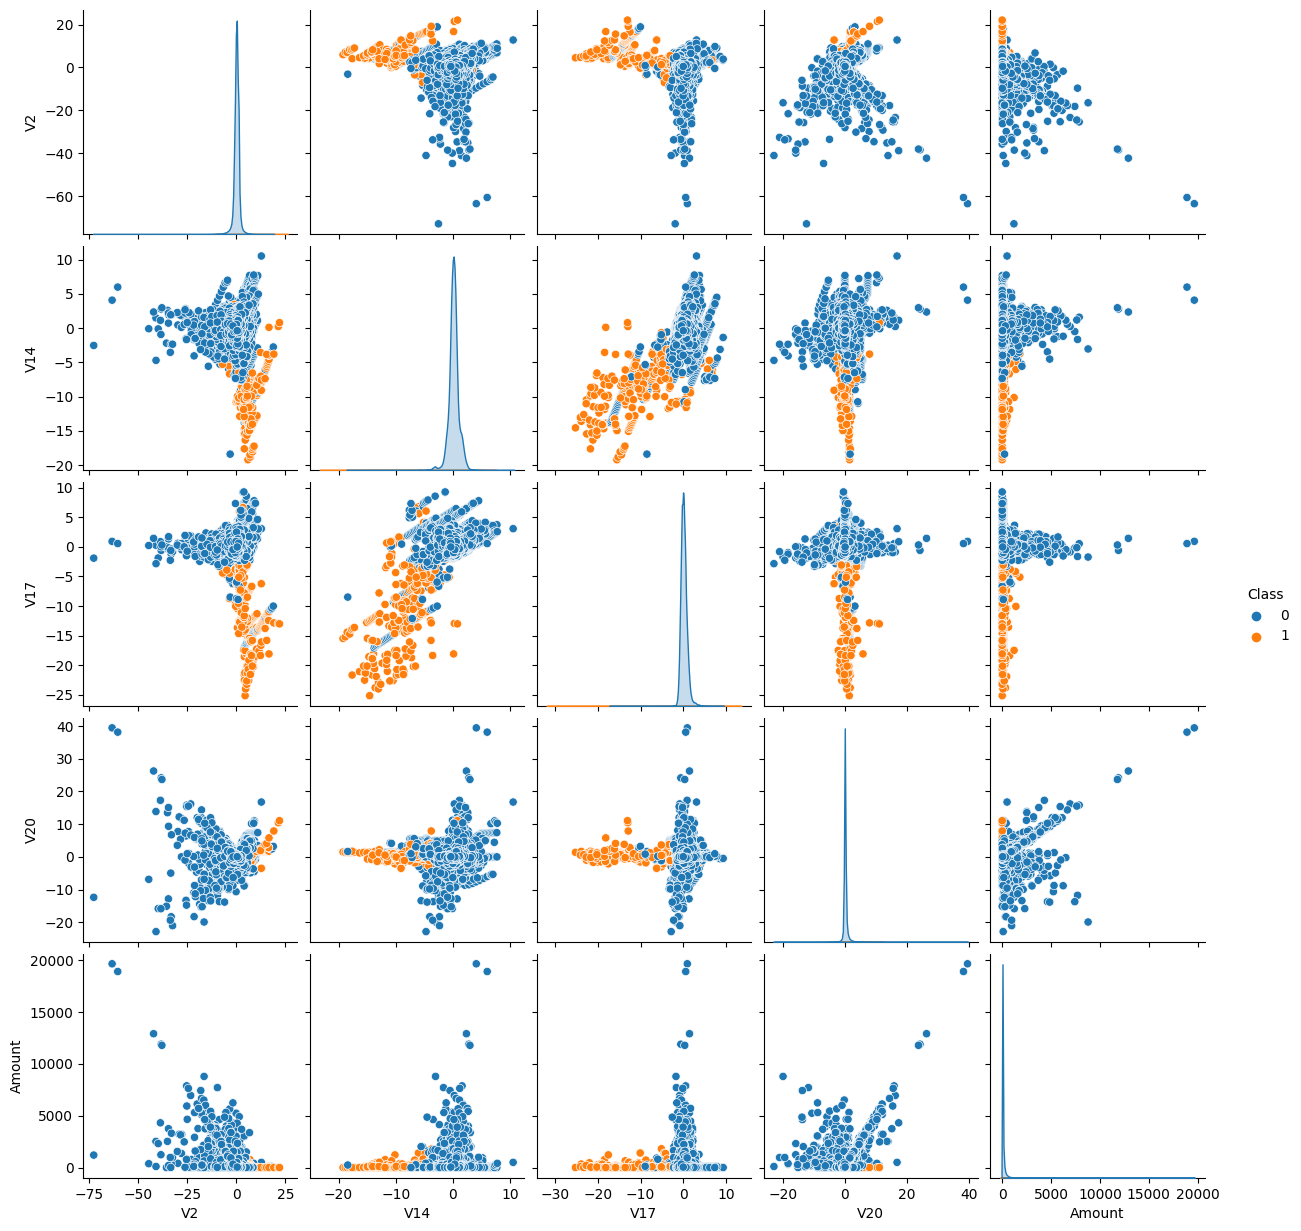

In [11]:
sns.pairplot(train_df[['V2', 'V14', 'V17', 'V20', 'Amount', 'Class']], hue = 'Class')

- `(V17, V2)`, `(V17, V20)`, 그리고 `(V17, Amount)`를 봤을 때 Class가 어느정도 선형 분리되어있음
- class imbalance 문제로 oversampling/undersampling 적용 필요해보임


다중공산성

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

cols = train_df.drop('Class', axis=1).columns

vif_data = pd.DataFrame()
vif_data["feature"] = cols
vif_data["VIF"] = [variance_inflation_factor(train_df[cols], i) for i in range(train_df[cols].shape[1])]

display(vif_data.sort_values('VIF', ascending=False))

,feature,VIF
29,Amount,15.102151
2,V2,5.230904
5,V5,3.302892
7,V7,3.128893
20,V20,2.313743
0,Time,2.309461
1,V1,2.085906
6,V6,1.738845
3,V3,1.457096
23,V23,1.325535


- Amount의 VIF 값이 `15.102`로, 다른 피처들과 강한 다중공선성을 가지고 있음이 확인되었음
- 트리 기반 모델의 특성상 이 문제를 완화할 수 있어 피처를 유지하기로 결정

# 데이터 전처리
---

중복값(duplicated)

In [13]:
train_df[train_df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,,,,,,,,,,,,,,,,,,,,,
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169344,119650.0,-8.550341,5.431877,-0.424397,-0.631987,-0.630205,0.227374,1.788103,-1.940776,7.140684,...,-1.427574,-1.464142,-0.166805,-0.191920,0.858614,-1.403084,-4.031115,-1.252425,14.94,0
170001,119968.0,-0.130796,0.896565,-0.099684,1.138297,3.353437,1.675036,2.287961,-1.346907,-0.546798,...,0.222421,1.787127,-0.858527,-0.849740,0.230873,0.094501,-1.476704,-1.155874,1.00,0
170002,119968.0,-0.130796,0.896565,-0.099684,1.138297,3.353437,1.675036,2.287961,-1.346907,-0.546798,...,0.222421,1.787127,-0.858527,-0.849740,0.230873,0.094501,-1.476704,-1.155874,1.00,0


In [14]:
# 삭제처리
train_df.drop_duplicates(inplace=True)
#test_df.drop_duplicates(inplace=True)

이상치(outliers)

<Axes: ylabel='Amount'>

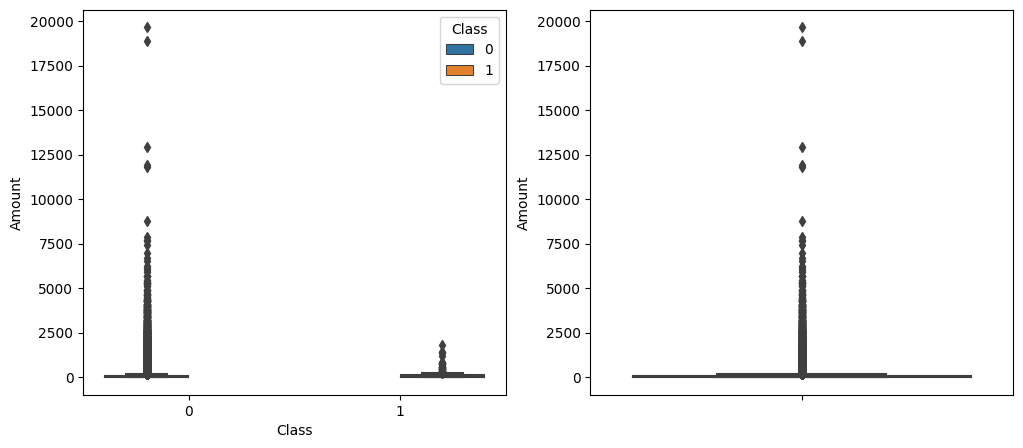

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(train_df, x= 'Class', y='Amount', hue= 'Class')

plt.subplot(122)
sns.boxplot(train_df, y='Amount')

In [16]:
def bounds_for_outliers_by_IQR(X, feat):
  q1 = X[feat].quantile(0.25)
  q3 = X[feat].quantile(0.75)
  IQR = q3 - q1

  lb = q1 - 1.5 * IQR
  ub = q3 + 1.5 * IQR

  return lb, ub

In [17]:
lb,ub = bounds_for_outliers_by_IQR(train_df, 'Amount')

print("--- --- IQR 기반 Amount 이상치 분석 --- ")
print("a. 경계값(Boundary)")
print(f"- 하한(Lower Bound): {lb:.2f}")
print(f"- 상한(Upper Bound): {ub:.2f}")
print("\nb. 이상치 데이터")
print(f"- 하한 경계 미만 데이터 수: {len(train_df[train_df['Amount'] < lb])} 건")
print(f"- 상한 경계 초과 데이터 수: {len(train_df[train_df['Amount'] > ub])} 건 ({(len(train_df[train_df['Amount'] >= ub]) / len(train_df) * 100) :.2f} %)")

--- --- IQR 기반 Amount 이상치 분석 --- 
a. 경계값(Boundary)
- 하한(Lower Bound): -101.72
- 상한(Upper Bound): 184.16

b. 이상치 데이터
- 하한 경계 미만 데이터 수: 0 건
- 상한 경계 초과 데이터 수: 18814 건 (11.05 %)


In [18]:
train_df[train_df['Amount'] >= ub]['Class'].value_counts()

Class
0    18755
1       59
Name: count, dtype: int64

- 이상치의 비율이 높기 때문에 직접적인 조치를 취하기보다는 이상치에 덜 민감한 트리 기반의 모델을 활용하고자 함

time

<Axes: xlabel='Time', ylabel='count'>

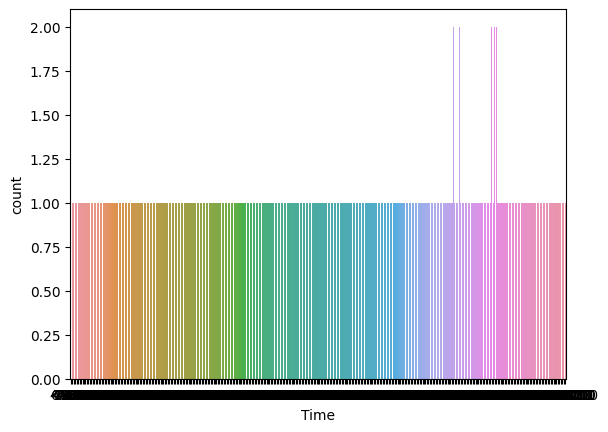

In [19]:
sns.countplot(train_df[train_df.Class ==1], x = 'Time')

- 위 데이터에서 count=1인 데이터의 패턴을 보면 규칙적인 것을 확인할 수 있음
- 이 정도를 활용하여 추가 분석을 진행하고자 함
  1. 특정 시간대 또는 특정 요일에 사기 거래가 자주 발생했을 가능성 확인
  2. 사기 거래는 이전 거래와의 시간이 짧을 가능성 확인

In [20]:
# Time 파생변수
train_df['hour'] = train_df.Time // 3600 % 24
train_df['hour'] = train_df['hour'].astype('int')

train_df['day_of_week'] = train_df.Time // 3600 * 24 % 7
train_df['day_of_week'] = train_df['day_of_week'].astype('int')

train_df['Time_Gap'] = train_df['Time'] - train_df['Time'].shift(1)
train_df['Time_Gap'] = train_df['Time_Gap'].fillna(0).astype('int')

Text(0.5, 1.0, 'Frequency of day of the week (class=1)')

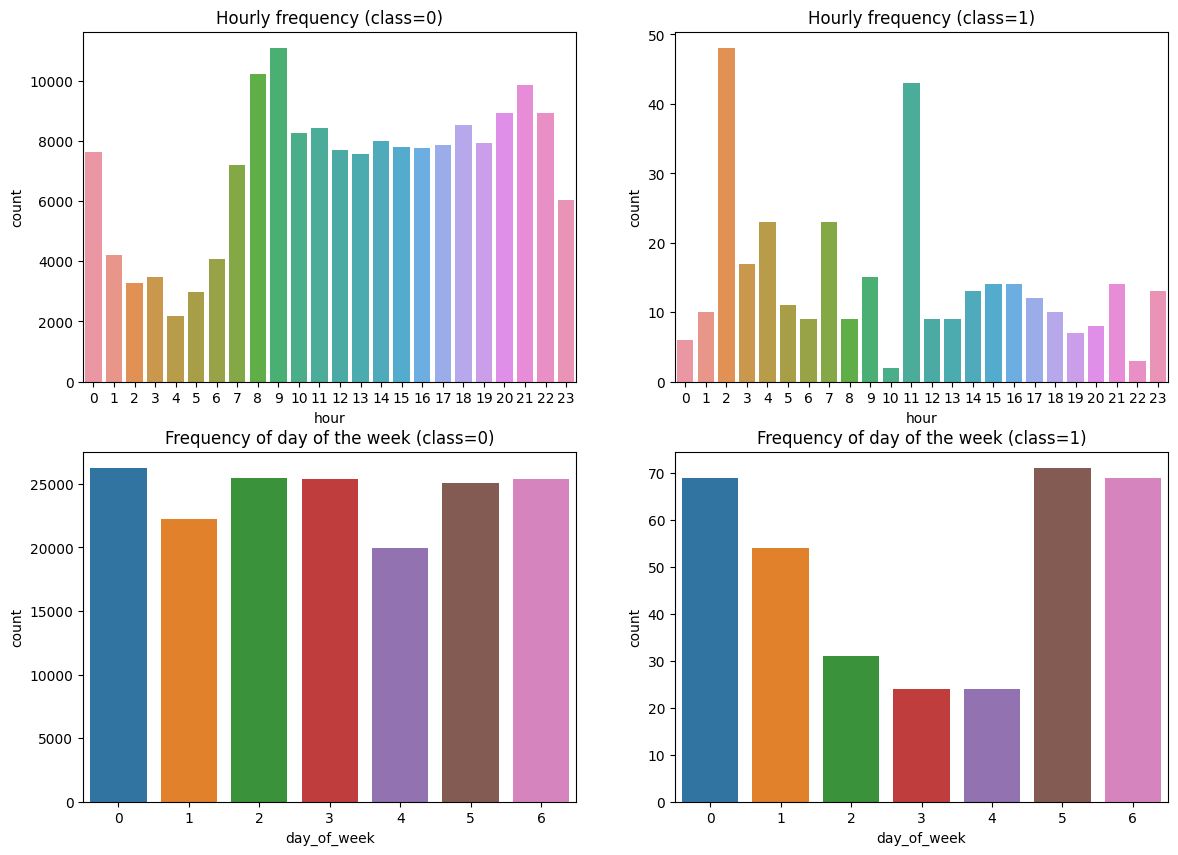

In [21]:
plt.figure(figsize = (14, 10))

plt.subplot(221)
sns.countplot(train_df[train_df.Class ==0], x = 'hour')
plt.title('Hourly frequency (class=0)')

plt.subplot(222)
sns.countplot(train_df[train_df.Class ==1], x = 'hour')
plt.title('Hourly frequency (class=1)')

plt.subplot(223)
sns.countplot(train_df[train_df.Class ==0], x = 'day_of_week')
plt.title('Frequency of day of the week (class=0)')

plt.subplot(224)
sns.countplot(train_df[train_df.Class ==1], x = 'day_of_week')
plt.title('Frequency of day of the week (class=1)')

- Time을 토대로 추출한 시간(`hour`)과 요일 정보(`day_of_week`)를 기준으로 거래 발생 빈도를 시각화하였음
    - 사기거래는 시간 기준으로 `2시`, `11시`에 많이 발생했음을 확인하였고,
    - 요일별로는 `2~4`에 해당하는 요일보다 `0`,`5` 또는 `6`에 해당하는 요일에 더 많이 발생했음 
- 사기거래의 빈도수(비율)이 적기 때문에 오버샘플링을 한 이후 더욱 의미있는 feature가 될 것으로 판단함

Text(0.5, 1.0, 'Distribution of Amounts by Day_of_the_week (Class = 1)')

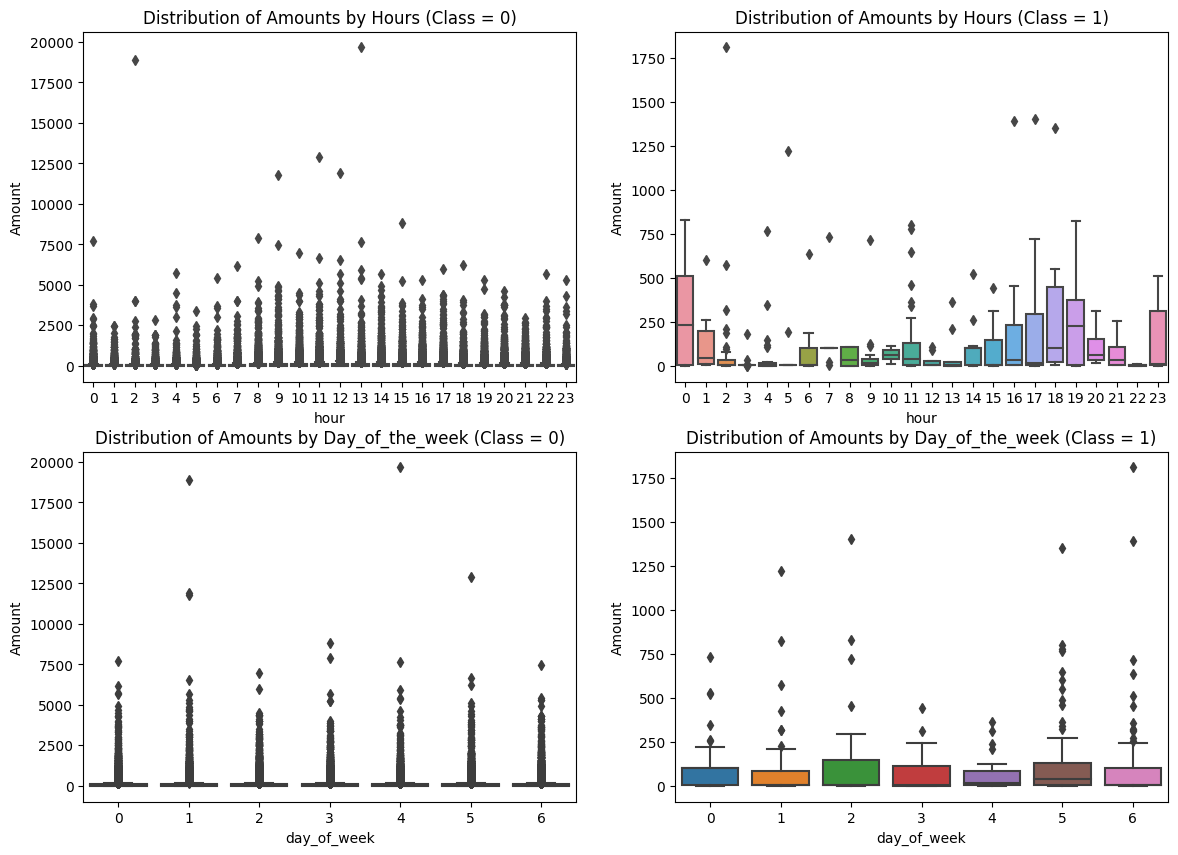

In [22]:
plt.figure(figsize = (14, 10))

plt.subplot(221)
sns.boxplot(train_df[train_df.Class ==0], x = 'hour', y = 'Amount')
plt.title('Distribution of Amounts by Hours (Class = 0)')

plt.subplot(222)
sns.boxplot(train_df[train_df.Class ==1], x = 'hour', y = 'Amount')
plt.title('Distribution of Amounts by Hours (Class = 1)')

plt.subplot(223)
sns.boxplot(train_df[train_df.Class ==0], x = 'day_of_week', y = 'Amount')
plt.title('Distribution of Amounts by Day_of_the_week (Class = 0)')

plt.subplot(224)
sns.boxplot(train_df[train_df.Class ==1], x = 'day_of_week', y = 'Amount')
plt.title('Distribution of Amounts by Day_of_the_week (Class = 1)')

- 시간대와 요일별 거래량(`Amount`)을 시각화하였음
    - 정상 거래는 시간대와 무관하게 거래량의 분포가 어느정도 일관성있게 보이지만, 사기 거래의 경우, 거래량이 정상 거래와 비슷한 시간대와 그렇지 않은 시간대가 있음을 확인함
    - 사기 거래는 `5, 6`에 해당하는 요일에 거래량이 커지는 경향이 나타났음 

Text(0.5, 1.0, 'Distribution of Time_Gap (Class = 1)')

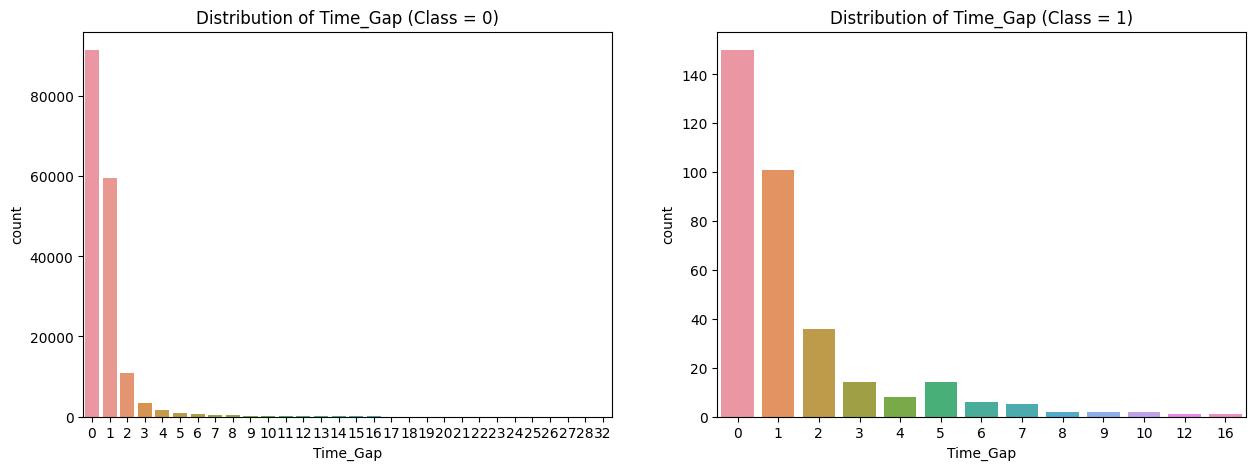

In [23]:
plt.figure(figsize = (15, 5))

plt.subplot(121)
sns.countplot(train_df[train_df.Class ==0], x = 'Time_Gap')
plt.title('Distribution of Time_Gap (Class = 0)')

plt.subplot(122)
sns.countplot(train_df[train_df.Class ==1], x = 'Time_Gap')
plt.title('Distribution of Time_Gap (Class = 1)')

- `Time Gap`(이전 거래와의 시간 차이)의 분포를 보면, 정상거래와 사기거래 비율이 다름을 감안해도 크게 차이가 없음을 확인함
- `Time Gap`은 학습에서 제외하였음 

# 모델 선택 및 파이프라인 구축
---
- 개요: Class 경계면을 식별하기 어려운 분포를 가진 데이터이기 떄문에 다양한 oversampling 기법을 활용하여 초기 학습 모델을 선정하였고, 선정된 모델에 대한 GridSearch를 수행하였음
- 스케일링
    - `Amount`에만 적용
- 오버 샘플링 기법
    - SMOTE: 소수 클래스 주변에서 샘플링
    - BorderlineSMOTE: 클래스 경계에 있는 소수 클래스 샘플링
    - SMOTEENN: SMOTE 샘플링 후 노이즈 제거  
- 분류 모델  
    - Decision Tree, Random Forest, LightGBM, XGBoost

전처리 및 모델 학습 파이프라인

In [24]:
from sklearn.model_selection import train_test_split

X = train_df.drop(['Time', 'Time_Gap', 'Class'], axis=1)
y = train_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTEENN


# 스케일링: 'Amount'만 스케일링 적용
preprocessor = ColumnTransformer(
    transformers = [('Amount', StandardScaler(), ['Amount'])], 
    remainder='passthrough')

# 모델
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss') 
}

# SMOTE 파이프라인
pipelines = {}
for name, model in models.items():
    pipelines[name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

# BorderlineSMOTE 파이프라인
borderline_smote_pipeline = {}
for name, model in models.items():
    borderline_smote_pipeline[name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', BorderlineSMOTE(random_state=42)),
        ('classifier', model)
    ])

# SMOTEENN 파이프라인
smote_enn_pipeline = {}
for name, model in models.items():
    smote_enn_pipeline[name] = ImbPipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTEENN(random_state=42)),
        ('classifier', model)
    ])

## 모델 학습

SMOTE + Models

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

results = {}
for name, pipeline in pipelines.items():
    print(f"\n--- {name} 모델 학습 ---")
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_proba = None
    if hasattr(pipeline, 'predict_proba'):
        y_proba = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': auc
    }
    print(f"정확도: {accuracy:.4f}\n정밀도: {precision:.4f}\n재현율: {recall:.4f}\nF1-점수: {f1:.4f}")

    if isinstance(auc, str):
        print(f"ROC AUC: {auc}\n")
    else:
        print(f"ROC AUC: {auc:.4f}\n")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
print("\n--- 최종 성능 비교 ---")
display(pd.DataFrame(results))


--- Decision Tree 모델 학습 ---
정확도: 0.9974
정밀도: 0.4252
재현율: 0.7941
F1-점수: 0.5538
ROC AUC: 0.8960

Confusion Matrix:
 [[33908    73]
 [   14    54]]

--- Random Forest 모델 학습 ---
정확도: 0.9996
정밀도: 0.9365
재현율: 0.8676
F1-점수: 0.9008
ROC AUC: 0.9876

Confusion Matrix:
 [[33977     4]
 [    9    59]]

--- LightGBM 모델 학습 ---
[LightGBM] [Info] Number of positive: 135920, number of negative: 135920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.082583 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 271840, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
정확도: 0.9994
정밀도: 0.8219
재현율: 0.8824
F1-점수: 0.8511
ROC AUC: 0.9751

Confusion Matrix:
 [[33968    13]
 [    8    60]]

--- XGBoost 모델 학습 ---
정확도: 0.9996
정밀도: 0.9206
재현율: 0.8529
F1-점수: 0.8855
ROC AUC: 0.9839

Confusion Matrix:
 [[33976     5]
 

,Decision Tree,Random Forest,LightGBM,XGBoost
Accuracy,0.997445,0.999618,0.999383,0.999559
Precision,0.425197,0.936508,0.821918,0.920635
Recall,0.794118,0.867647,0.882353,0.852941
F1-Score,0.553846,0.900763,0.851064,0.885496
ROC AUC,0.895985,0.987619,0.975067,0.983941


BorderlineSMOTE + Models

In [27]:
results_b = {}
for name, pipeline in borderline_smote_pipeline.items():
    print(f"\n--- {name} 모델 학습 ---")
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_proba = None
    if hasattr(pipeline, 'predict_proba'):
        y_proba = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

    results_b[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': auc
    }
    print(f"정확도: {accuracy:.4f}\n정밀도: {precision:.4f}\n재현율: {recall:.4f}\nF1-점수: {f1:.4f}")

    if isinstance(auc, str):
        print(f"ROC AUC: {auc}\n")
    else:
        print(f"ROC AUC: {auc:.4f}\n")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
print("\n--- 최종 성능 비교 ---")
display(pd.DataFrame(results_b))


--- Decision Tree 모델 학습 ---
정확도: 0.9991
정밀도: 0.8136
재현율: 0.7059
F1-점수: 0.7559
ROC AUC: 0.8528

Confusion Matrix:
 [[33970    11]
 [   20    48]]

--- Random Forest 모델 학습 ---
정확도: 0.9996
정밀도: 0.9500
재현율: 0.8382
F1-점수: 0.8906
ROC AUC: 0.9542

Confusion Matrix:
 [[33978     3]
 [   11    57]]

--- LightGBM 모델 학습 ---
[LightGBM] [Info] Number of positive: 135920, number of negative: 135920
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.044526 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 271840, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
정확도: 0.9994
정밀도: 0.8310
재현율: 0.8676
F1-점수: 0.8489
ROC AUC: 0.9862

Confusion Matrix:
 [[33969    12]
 [    9    59]]

--- XGBoost 모델 학습 ---
정확도: 0.9996
정밀도: 0.9219
재현율: 0.8676
F1-점수: 0.8939
ROC AUC: 0.9901

Confusion Matrix:
 [[33976     5]
 

,Decision Tree,Random Forest,LightGBM,XGBoost
Accuracy,0.999090,0.999589,0.999383,0.999589
Precision,0.813559,0.950000,0.830986,0.921875
Recall,0.705882,0.838235,0.867647,0.867647
F1-Score,0.755906,0.890625,0.848921,0.893939
ROC AUC,0.852779,0.954208,0.986228,0.990086


SMOTENN + Models

In [28]:
results_n = {}
for name, pipeline in smote_enn_pipeline.items():
    print(f"\n--- {name} 모델 학습 ---")
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)
    y_proba = None
    if hasattr(pipeline, 'predict_proba'):
        y_proba = pipeline.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else 'N/A'

    results_n[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': auc
    }
    print(f"정확도: {accuracy:.4f}\n정밀도: {precision:.4f}\n재현율: {recall:.4f}\nF1-점수: {f1:.4f}")

    if isinstance(auc, str):
        print(f"ROC AUC: {auc}\n")
    else:
        print(f"ROC AUC: {auc:.4f}\n")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    
print("\n--- 최종 성능 비교 ---")
display(pd.DataFrame(results_n))


--- Decision Tree 모델 학습 ---
정확도: 0.9973
정밀도: 0.4173
재현율: 0.8529
F1-점수: 0.5604
ROC AUC: 0.9253

Confusion Matrix:
 [[33900    81]
 [   10    58]]

--- Random Forest 모델 학습 ---
정확도: 0.9995
정밀도: 0.8806
재현율: 0.8676
F1-점수: 0.8741
ROC AUC: 0.9817

Confusion Matrix:
 [[33973     8]
 [    9    59]]

--- LightGBM 모델 학습 ---
[LightGBM] [Info] Number of positive: 135920, number of negative: 135687
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046639 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 271607, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500429 -> initscore=0.001716
[LightGBM] [Info] Start training from score 0.001716
정확도: 0.9992
정밀도: 0.7662
재현율: 0.8676
F1-점수: 0.8138
ROC AUC: 0.9454

Confusion Matrix:
 [[33963    18]
 [    9    59]]

--- XGBoost 모델 학습 ---
정확도: 0.9994
정밀도: 0.8333
재현율: 0.8824
F1-점수: 0.8571

,Decision Tree,Random Forest,LightGBM,XGBoost
Accuracy,0.997327,0.999501,0.999207,0.999413
Precision,0.417266,0.880597,0.766234,0.833333
Recall,0.852941,0.867647,0.867647,0.882353
F1-Score,0.560386,0.874074,0.813793,0.857143
ROC AUC,0.925279,0.981716,0.945421,0.982649


In [29]:
print('SMOTE + Models 결과: ')
display(pd.DataFrame(results))

print('\nBorderlineSMOTE + Models 결과: ')
display(pd.DataFrame(results_b))

print('\nSMOTEENN + Models 결과: ')
display(pd.DataFrame(results_n))

SMOTE + Models 결과: 


,Decision Tree,Random Forest,LightGBM,XGBoost
Accuracy,0.997445,0.999618,0.999383,0.999559
Precision,0.425197,0.936508,0.821918,0.920635
Recall,0.794118,0.867647,0.882353,0.852941
F1-Score,0.553846,0.900763,0.851064,0.885496
ROC AUC,0.895985,0.987619,0.975067,0.983941



BorderlineSMOTE + Models 결과: 


,Decision Tree,Random Forest,LightGBM,XGBoost
Accuracy,0.999090,0.999589,0.999383,0.999589
Precision,0.813559,0.950000,0.830986,0.921875
Recall,0.705882,0.838235,0.867647,0.867647
F1-Score,0.755906,0.890625,0.848921,0.893939
ROC AUC,0.852779,0.954208,0.986228,0.990086



SMOTEENN + Models 결과: 


,Decision Tree,Random Forest,LightGBM,XGBoost
Accuracy,0.997327,0.999501,0.999207,0.999413
Precision,0.417266,0.880597,0.766234,0.833333
Recall,0.852941,0.867647,0.867647,0.882353
F1-Score,0.560386,0.874074,0.813793,0.857143
ROC AUC,0.925279,0.981716,0.945421,0.982649


## 교차 검증
- 위 모델 학습 결과에서 F1-Score 그리고 ROC AUC 결과가 가장 좋았던 파이프라인을 후보로 교차 검증을 수행하였음
- 교차 검증은 클래스 불균형을 고려하여 `StratifiedKFold` 방식을 채택하였음 
    - SMOTE, BorderlineSMOTE + Random Forest, XGBoost

In [30]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models_to_cv = {
    'Random Forest': pipelines['Random Forest'],
    'XGBoost': pipelines['XGBoost']
}

# 각 모델의 교차 검증 결과를 저장할 딕셔너리
cv_results = {}

for name, pipeline in models_to_cv.items():
    print(f"\n--- {name} 모델 교차 검증 시작 (5-Fold) ---")
    
    f1_scores = []
    
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        print(f"  > Fold {fold+1}/{5} ...")
        
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        pipeline.fit(X_train_fold, y_train_fold)
        y_pred_fold = pipeline.predict(X_val_fold)
        
        f1 = f1_score(y_val_fold, y_pred_fold, zero_division=0)
        f1_scores.append(f1)
        
    cv_results[name] = {
        'F1-Scores': f1_scores,
        'Mean F1-Score': np.mean(f1_scores),
        'Std F1-Score': np.std(f1_scores)
    }
    
    print(f"--- {name} 모델 교차 검증 완료 ---")
    print(f"  F1-Score: {np.round(f1_scores, 4)}")
    print(f"  평균 F1-Score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})\n")

# 최종 교차 검증 결과 출력
print("====================================")
print("       최종 교차 검증 결과       ")
print("====================================")
for name, scores in cv_results.items():
    print(f"모델: {name}")
    print(f"  평균 F1-Score: {scores['Mean F1-Score']:.4f}")
    print(f"  표준편차: {scores['Std F1-Score']:.4f}\n")


--- Random Forest 모델 교차 검증 시작 (5-Fold) ---
  > Fold 1/5 ...
  > Fold 2/5 ...
  > Fold 3/5 ...
  > Fold 4/5 ...
  > Fold 5/5 ...
--- Random Forest 모델 교차 검증 완료 ---
  F1-Score: [0.8515 0.8283 0.8571 0.902  0.8411]
  평균 F1-Score: 0.8560 (+/- 0.0250)


--- XGBoost 모델 교차 검증 시작 (5-Fold) ---
  > Fold 1/5 ...
  > Fold 2/5 ...
  > Fold 3/5 ...
  > Fold 4/5 ...
  > Fold 5/5 ...
--- XGBoost 모델 교차 검증 완료 ---
  F1-Score: [0.8762 0.835  0.8727 0.9057 0.8519]
  평균 F1-Score: 0.8683 (+/- 0.0239)

       최종 교차 검증 결과       
모델: Random Forest
  평균 F1-Score: 0.8560
  표준편차: 0.0250

모델: XGBoost
  평균 F1-Score: 0.8683
  표준편차: 0.0239



In [31]:
models_to_cv_b = {
    'Random Forest': borderline_smote_pipeline['Random Forest'],
    'XGBoost': borderline_smote_pipeline['XGBoost']
}

cv_results_b = {}
for name, pipeline in models_to_cv_b.items():
    print(f"\n--- {name} 모델 교차 검증 시작 (5-Fold) ---")
    
    f1_scores = []
    
    for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
        print(f"  > Fold {fold+1}/{5} ...")
        
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
        
        pipeline.fit(X_train_fold, y_train_fold)
        y_pred_fold = pipeline.predict(X_val_fold)
        
        f1 = f1_score(y_val_fold, y_pred_fold, zero_division=0)
        f1_scores.append(f1)
        
    cv_results_b[name] = {
        'F1-Scores': f1_scores,
        'Mean F1-Score': np.mean(f1_scores),
        'Std F1-Score': np.std(f1_scores)
    }
    
    print(f"--- {name} 모델 교차 검증 완료 ---")
    print(f"  F1-Score: {np.round(f1_scores, 4)}")
    print(f"  평균 F1-Score: {np.mean(f1_scores):.4f} (+/- {np.std(f1_scores):.4f})\n")

# 최종 교차 검증 결과 출력
print("====================================")
print("       최종 교차 검증 결과       ")
print("====================================")
for name, scores in cv_results_b.items():
    print(f"모델: {name}")
    print(f"  평균 F1-Score: {scores['Mean F1-Score']:.4f}")
    print(f"  표준편차: {scores['Std F1-Score']:.4f}\n")


--- Random Forest 모델 교차 검증 시작 (5-Fold) ---
  > Fold 1/5 ...
  > Fold 2/5 ...
  > Fold 3/5 ...
  > Fold 4/5 ...
  > Fold 5/5 ...
--- Random Forest 모델 교차 검증 완료 ---
  F1-Score: [0.8333 0.8247 0.8598 0.8687 0.8269]
  평균 F1-Score: 0.8427 (+/- 0.0180)


--- XGBoost 모델 교차 검증 시작 (5-Fold) ---
  > Fold 1/5 ...
  > Fold 2/5 ...
  > Fold 3/5 ...
  > Fold 4/5 ...
  > Fold 5/5 ...
--- XGBoost 모델 교차 검증 완료 ---
  F1-Score: [0.8485 0.8269 0.8649 0.8738 0.8519]
  평균 F1-Score: 0.8532 (+/- 0.0160)

       최종 교차 검증 결과       
모델: Random Forest
  평균 F1-Score: 0.8427
  표준편차: 0.0180

모델: XGBoost
  평균 F1-Score: 0.8532
  표준편차: 0.0160



In [32]:
with pd.option_context('display.float_format', '{:.4f}'.format):
    print('Cross Validation with SMOTE 결과: ')
    display(pd.DataFrame(cv_results)[1:])
    
    print('\nCross Validation with BorderlineSMOTE 결과: ')
    display(pd.DataFrame(cv_results_b)[1:])

Cross Validation with SMOTE 결과: 


,Random Forest,XGBoost
Mean F1-Score,0.8560,0.8683
Std F1-Score,0.0250,0.0239



Cross Validation with BorderlineSMOTE 결과: 


,Random Forest,XGBoost
Mean F1-Score,0.8427,0.8532
Std F1-Score,0.0180,0.0160


- 최초 학습 후 분류 성능이 좋았던 파이프라인에 대한 교차 검증을 수행하였음
- 그 결과, SMOTE를 활용한 XGBoost 모델이 평균 F1-Score도 높고 표준편차도 가장 낮은 모델임을 확인하였음. 

# Hyperparameter Tuning
---  
- tuning 시간이 너무 오래걸리는 관계로 아래와 같이 전략을 세움
1. RandomizeSearchCV를 활용하여 넓은 범위에서 최적 파라미터 후보 탐색
2. 위에서 찾은 파라미터 후보를 바탕으로 GridSearchCV로 좁은 범위 탐색

In [33]:
from sklearn.model_selection import KFold, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.base import clone
from tqdm import tqdm
import random
import itertools

# RandomizedSearchCV
best_pipeline = pipelines['XGBoost']

param_distributions = {
    'classifier__n_estimators': [50, 100, 200, 300, 500, 1000, 1500, 2000],
    'classifier__max_depth': [3, 6, 9, 12],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.5, 0.7, 0.9, 1.0],
    'classifier__colsample_bytree': [0.5, 0.7, 0.9, 1.0],
}
n_iter = 20
param_combinations_random = []
for _ in range(n_iter):
    param = {key: random.choice(value) for key, value in param_distributions.items()}
    param_combinations_random.append(param)

best_score_random = -1.0
best_params_from_random = None

for params in tqdm(param_combinations_random, desc="Randomized Search Progress"):
    pipeline = clone(best_pipeline).set_params(**params)
    
    cv_scores = cross_val_score(
        pipeline, X_train, y_train,
        cv= StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='f1', n_jobs=-1
    )
    
    mean_score = cv_scores.mean()
    if mean_score > best_score_random:
        best_score_random = mean_score
        best_params_from_random = params

print(f"\nRandomizedSearch 최적 파라미터: {best_params_from_random}")
print(f"RandomizedSearch 최고 F1-Score: {best_score_random:.4f}")

Randomized Search Progress: 100%|██████████| 20/20 [22:10<00:00, 66.51s/it]


RandomizedSearch 최적 파라미터: {'classifier__n_estimators': 1000, 'classifier__max_depth': 12, 'classifier__learning_rate': 0.05, 'classifier__subsample': 1.0, 'classifier__colsample_bytree': 0.5}
RandomizedSearch 최고 F1-Score: 0.8754


In [34]:
# GridSearchCV
param_grid_refined = {
    'classifier__n_estimators': [1200, 1500, 1800],
    'classifier__max_depth': [8, 9, 10],
    'classifier__learning_rate': [0.08, 0.1, 0.12],
    'classifier__subsample': [0.65, 0.7, 0.75],
    'classifier__colsample_bytree': [0.85, 0.9, 0.95],
}

grid_search = GridSearchCV(
    best_pipeline,
    param_grid_refined,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X, y)

print("\nGrid Search 최적 파라미터:", grid_search.best_params_)
print(f"Grid Search 최고 F1-Score: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Grid Search 최적 파라미터: {'classifier__colsample_bytree': 0.95, 'classifier__learning_rate': 0.1, 'classifier__max_depth': 8, 'classifier__n_estimators': 1200, 'classifier__subsample': 0.7}
Grid Search 최고 F1-Score: 0.8756


최종 모델 학습

In [35]:
final_pipeline = grid_search.best_estimator_
y_pred = final_pipeline.predict(X_test)
y_pred_proba = final_pipeline.predict_proba(X_test)[:, 1]

test_f1 = f1_score(y_test, y_pred)
test_roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\n테스트 데이터셋 F1 Score: {test_f1:.4f}")
print(f"테스트 데이터셋 ROC AUC: {test_roc_auc:.4f}")


테스트 데이터셋 F1 Score: 1.0000
테스트 데이터셋 ROC AUC: 1.0000


- 데이터 유츌을 의심해볼 수 있을정도로 완벽한 성능이 나왔음
- 데이터 문제라고 판단됨

# 사후분석

Feature Importance

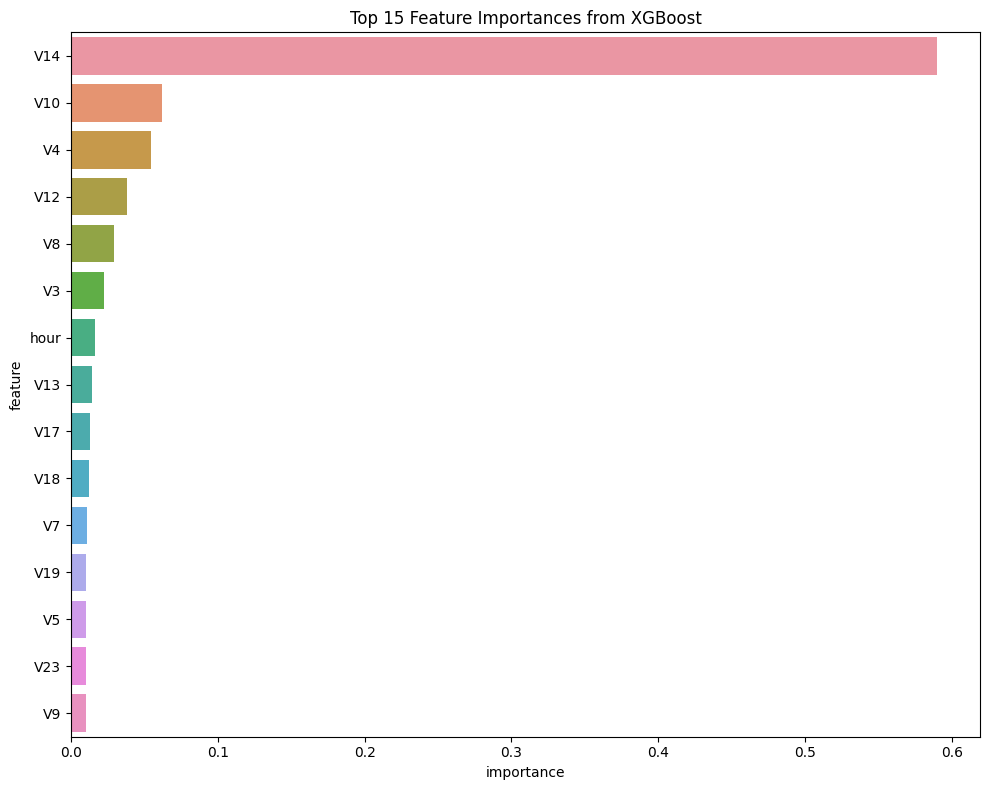

In [36]:
feature_names_out = final_pipeline.named_steps['preprocessor'].get_feature_names_out()

feature_names = [name.replace('remainder__', '') for name in feature_names_out]
feature_importances = final_pipeline.named_steps['classifier'].feature_importances_

feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances from XGBoost')
plt.tight_layout()
plt.show()

- XGBoost 모델의 feature importance 분석을 수행하였음
- 그 결과, `V14`, `V12`, `V4` 순으로 기여를 많이한 것으로 식별되었음.
- 또한 Time의 파생 변수인 `hour`도 top 10에 들어있는 것을 확인하였음.

학습 곡선 시각화 추가

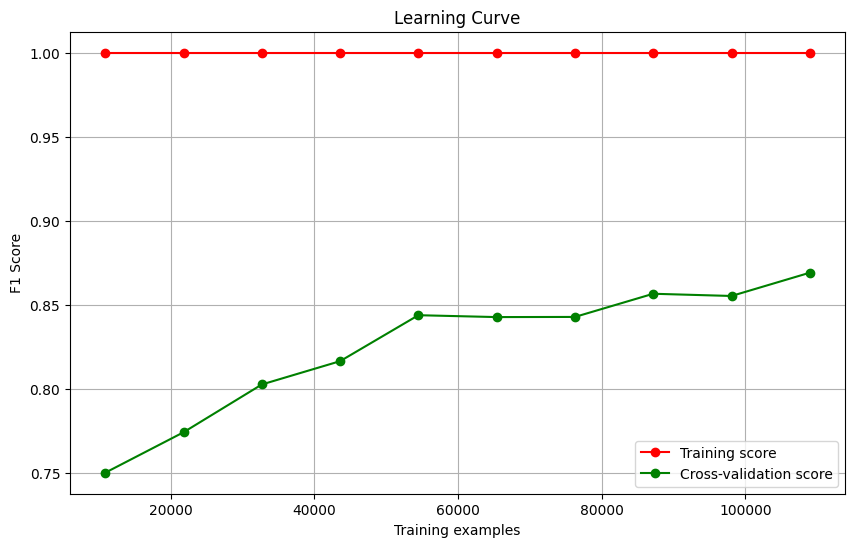

In [37]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(
    final_pipeline, X_train, y_train,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring='f1',
    n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("F1 Score")
plt.legend(loc="best")
plt.grid()
plt.show()


# submission 
---

In [38]:
# 파생 변수 생성 및 불필요한 컬럼 정리
test_df['hour'] = test_df.Time // 3600 % 24
test_df['hour'] = test_df['hour'].astype('int')

test_df['day_of_week'] = test_df.Time // 3600 * 24 % 7
test_df['day_of_week'] = test_df['day_of_week'].astype('int')

test_df.drop(['Time'], axis=1, inplace = True)

test_pred_proba = final_pipeline.predict_proba(test_df.drop('Class', axis=1) if 'Class' in test_df.columns else test_df)[:, 1]
test_pred = (test_pred_proba > 0.5).astype(int)

submission = pd.DataFrame({
    "id": test_df.index,
    "Class": test_pred
})

display(submission)
submission.to_csv("/kaggle/working/submission.csv", index=False)

,id,Class
0,170883,0
1,170884,0
2,170885,0
3,170886,0
4,170887,0
...,...,...
113918,284801,0
113919,284802,0
113920,284803,0
113921,284804,0
